In [1]:
import os, sys
sys.path.insert(0, os.path.abspath("../src"))

In [2]:
import numpy as np
import time
from qudit_sim import utils, tableau

C:\Users\Nina\Downloads\quditkit-main\quditkit-main\.venv\Lib\site-packages\cupy\_environment.py:215: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [3]:
SEED = 42

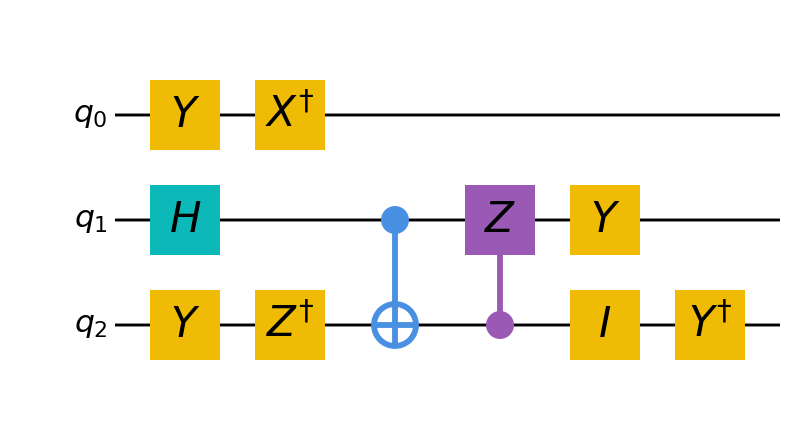

In [4]:
n, d = 3, 3
qc = utils.random_circuit(n, d, 10, 10, seed=SEED)
qc.draw()

In [5]:
tab = tableau.Tableau(n, d, full=True)
print(tab)

#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 0
d1 |  0  1  0 |  0  0  0 | 0
d2 |  0  0  1 |  0  0  0 | 0
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  0  0 |  0  1  0 | 0
s2 |  0  0  0 |  0  0  1 | 0


In [6]:
tab.apply_circuit(qc)
print(tab)

#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 2
d1 |  0  0  0 |  0  1  0 | 4
d2 |  0  0  1 |  0  1  0 | 2
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  2  2 |  0  2  2 | 2
s2 |  0  0  0 |  0  2  1 | 2


**Determine whether measurements are random or deterministic on each qudit:**

In [7]:
tab.measurement_kinds()

{0: 'det', 1: 'rand', 2: 'rand'}

**If the measurement is deterministic (or becomes deterministic in the mmt process) the desired value is overriden by the deterministic outcome.**

In [8]:
res1, mmt = tab.measure(0, seed=SEED)
print(mmt)
print(res1)

{0: 0}
#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 2
d1 |  0  0  0 |  0  1  0 | 4
d2 |  0  0  1 |  0  1  0 | 2
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  2  2 |  0  2  2 | 2
s2 |  0  0  0 |  0  2  1 | 2


In [9]:
res2, mmt = tab.measure(0, desired=2)
print(mmt)
print(res2)

{0: (0, 'det')}
#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 2
d1 |  0  0  0 |  0  1  0 | 4
d2 |  0  0  1 |  0  1  0 | 2
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  2  2 |  0  2  2 | 2
s2 |  0  0  0 |  0  2  1 | 2


In [10]:
res1 == res2

True

In [11]:
res1, mmt = tab.measure(1, seed=SEED)
print(mmt)
print(res1)

{1: 0}
#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 2
d1 |  0  1  1 |  0  1  1 | 2
d2 |  0  0  1 |  0  1  0 | 2
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  0  0 |  0  1  0 | 0
s2 |  0  0  0 |  0  2  1 | 2


In [12]:
res2, mmt = tab.measure(1, desired=0)
print(mmt)
print(res2)

{1: (0, 'rand')}
#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 2
d1 |  0  1  1 |  0  1  1 | 2
d2 |  0  0  1 |  0  1  0 | 2
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  0  0 |  0  1  0 | 0
s2 |  0  0  0 |  0  2  1 | 2


In [13]:
res1 == res2

True

In [14]:
res1, mmt = tab.measure(2, seed=SEED)
print(mmt)
print(res1)

{2: 0}
#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 2
d1 |  0  1  1 |  0  1  1 | 2
d2 |  0  2  0 |  0  0  2 | 2
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  0  0 |  0  0  1 | 0
s2 |  0  0  0 |  0  2  1 | 2


In [15]:
res2, mmt = tab.measure(2, desired=0)
print(mmt)
print(res2)

{2: (0, 'rand')}
#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 2
d1 |  0  1  1 |  0  1  1 | 2
d2 |  0  2  0 |  0  0  2 | 2
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  0  0 |  0  0  1 | 0
s2 |  0  0  0 |  0  2  1 | 2


In [16]:
res1 == res2

True

In [17]:
res1, mmt = tab.measure_all(seed=SEED)
print(mmt)
print(res1)

[0 0 2]
#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 2
d1 |  0  1  1 |  0  1  1 | 2
d2 |  0  0  1 |  0  1  0 | 2
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  0  0 |  0  1  0 | 0
s2 |  0  0  0 |  0  2  1 | 2


In [18]:
res2, mmt = tab.measure_all(desired=(0, 0, 2))
print(mmt)
print(res2)

[['0' 'det']
 ['0' 'rand']
 ['2' 'det']]
#  | x0 x1 x2 | z0 z1 z2 | τ
────────────────────────────
d0 |  1  0  0 |  0  0  0 | 2
d1 |  0  1  1 |  0  1  1 | 2
d2 |  0  0  1 |  0  1  0 | 2
----------------------------
s0 |  0  0  0 |  1  0  0 | 0
s1 |  0  0  0 |  0  1  0 | 0
s2 |  0  0  0 |  0  2  1 | 2


In [19]:
res1 == res2

True

## Try with a larger tableau

In [20]:
n, d = 5, 5
qc = utils.random_circuit(n, d, 25, 25, seed=SEED)

In [21]:
tab = tableau.Tableau(n, d, full=True)
tab.apply_circuit(qc)
print(tab)

#  | x0 x1 x2 x3 x4 | z0 z1 z2 z3 z4 | τ
────────────────────────────────────────
d0 |  0  0  0  0  0 |  4  0  0  0  0 | 4
d1 |  0  1  0  4  0 |  1  4  1  4  0 | 0
d2 |  0  0  0  0  0 |  0  0  1  0  0 | 0
d3 |  0  0  0  0  0 |  1  4  0  4  0 | 0
d4 |  0  0  0  0  1 |  0  0  0  0  0 | 4
----------------------------------------
s0 |  1  0  0  1  0 |  1  0  0  0  0 | 8
s1 |  0  0  0  0  0 |  0  1  0  0  0 | 8
s2 |  0  0  4  0  0 |  0  4  4  0  0 | 0
s3 |  0  0  0  1  0 |  0  4  0  0  0 | 0
s4 |  0  0  0  0  0 |  0  0  0  0  1 | 0


In [22]:
tab.measurement_kinds()

{0: 'rand', 1: 'det', 2: 'rand', 3: 'rand', 4: 'det'}

In [23]:
res1, mmt = tab.measure((0, 1, 3), seed=SEED)
print(mmt)
print(res1)

{0: 0, 1: 1, 3: 3}
#  | x0 x1 x2 x3 x4 | z0 z1 z2 z3 z4 | τ
────────────────────────────────────────
d0 |  1  0  0  0  0 |  1  1  0  0  0 | 8
d1 |  0  1  0  0  0 |  1  3  1  4  0 | 8
d2 |  0  0  0  0  0 |  0  0  1  0  0 | 0
d3 |  0  0  0  1  0 |  0  4  0  0  0 | 0
d4 |  0  0  0  0  1 |  0  0  0  0  0 | 4
----------------------------------------
s0 |  0  0  0  0  0 |  1  0  0  0  0 | 0
s1 |  0  0  0  0  0 |  0  1  0  0  0 | 8
s2 |  0  0  4  0  0 |  0  4  4  0  0 | 0
s3 |  0  0  0  0  0 |  0  0  0  1  0 | 4
s4 |  0  0  0  0  0 |  0  0  0  0  1 | 0


In [24]:
res2, mmt = tab.measure((0, 1, 3), desired=(0, 1, 3))
print(mmt)
print(res2)

{0: (0, 'rand'), 1: (1, 'det'), 3: (3, 'rand')}
#  | x0 x1 x2 x3 x4 | z0 z1 z2 z3 z4 | τ
────────────────────────────────────────
d0 |  1  0  0  0  0 |  1  1  0  0  0 | 8
d1 |  0  1  0  0  0 |  1  3  1  4  0 | 8
d2 |  0  0  0  0  0 |  0  0  1  0  0 | 0
d3 |  0  0  0  1  0 |  0  4  0  0  0 | 0
d4 |  0  0  0  0  1 |  0  0  0  0  0 | 4
----------------------------------------
s0 |  0  0  0  0  0 |  1  0  0  0  0 | 0
s1 |  0  0  0  0  0 |  0  1  0  0  0 | 8
s2 |  0  0  4  0  0 |  0  4  4  0  0 | 0
s3 |  0  0  0  0  0 |  0  0  0  1  0 | 4
s4 |  0  0  0  0  0 |  0  0  0  0  1 | 0


In [25]:
res1 == res2

True

In [26]:
res1, mmt = tab.measure_all(seed=SEED)
print(mmt)
print(res1)

[0 1 3 3 0]
#  | x0 x1 x2 x3 x4 | z0 z1 z2 z3 z4 | τ
────────────────────────────────────────
d0 |  1  0  0  0  0 |  1  1  0  0  0 | 8
d1 |  0  1  0  0  0 |  1  3  1  4  0 | 8
d2 |  0  0  1  0  0 |  0  1  1  0  0 | 2
d3 |  0  0  0  1  0 |  0  4  0  0  0 | 0
d4 |  0  0  0  0  1 |  0  0  0  0  0 | 4
----------------------------------------
s0 |  0  0  0  0  0 |  1  0  0  0  0 | 0
s1 |  0  0  0  0  0 |  0  1  0  0  0 | 8
s2 |  0  0  0  0  0 |  0  0  1  0  0 | 4
s3 |  0  0  0  0  0 |  0  0  0  1  0 | 4
s4 |  0  0  0  0  0 |  0  0  0  0  1 | 0


In [27]:
res2, mmt = tab.measure_all(desired=(0, 1, 3, 3, 0))
print(mmt)
print(res2)

[['0' 'rand']
 ['1' 'det']
 ['3' 'rand']
 ['3' 'rand']
 ['0' 'det']]
#  | x0 x1 x2 x3 x4 | z0 z1 z2 z3 z4 | τ
────────────────────────────────────────
d0 |  1  0  0  0  0 |  1  1  0  0  0 | 8
d1 |  0  1  0  0  0 |  1  3  1  4  0 | 8
d2 |  0  0  1  0  0 |  0  1  1  0  0 | 2
d3 |  0  0  0  1  0 |  0  4  0  0  0 | 0
d4 |  0  0  0  0  1 |  0  0  0  0  0 | 4
----------------------------------------
s0 |  0  0  0  0  0 |  1  0  0  0  0 | 0
s1 |  0  0  0  0  0 |  0  1  0  0  0 | 8
s2 |  0  0  0  0  0 |  0  0  1  0  0 | 4
s3 |  0  0  0  0  0 |  0  0  0  1  0 | 4
s4 |  0  0  0  0  0 |  0  0  0  0  1 | 0


In [28]:
res1 == res2

True